PROJET IAS 2022/2023 ⭐

-------------------------------------------------------------------------------

dataSet URL : 

-------------------------------------------------------------------------------

Thématique : 

-------------------------------------------------------------------------------
Membre : 

*   FERGUI
*   ACHOUR
*   NEDDAF

-------------------------------------------------------------------------------
Lien du dataset : 

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/code?datasetId=1866141&sortBy=voteCount


Nous importons les differentes bibliotheques qui nous permettrons de travailler sur notr dataset

In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import plotly.express as ex
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score



Nous téléchargeons ici le dataset sur lequel on fera notre analyse et traitement 

In [5]:
from google.colab import files
data_to_load = files.upload()
from sklearn.preprocessing import LabelEncoder

Saving star_classification.csv to star_classification.csv


Nous constatons que certains noms de colonnes ne sont pas parlant, on remplace certains par un nom plus significatif

In [6]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['star_classification.csv']))


In [7]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.info()
#infos sur les colonnes, on voit que la colonne 'classe' est de type objet, il faut la changer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
ex.pie(df,names='class',title='Proportion Of Different Class',hole=0.33)

Encodage des valeurs de la colonne "class" en [0,1,2]

In [8]:
le = LabelEncoder()
# on utilise un LabelEncoder() pour encoder les valeurs de 'class' en [0,1,2]
df_encoded = df["class"] = le.fit_transform(df["class"])
# on transforme le type de la colonne 'classe' en int64
df_converted = df["class"] = df["class"].astype(int)




In [ ]:
ex.pie(df_converted,names='class',title='Proportion Of Different Class',hole=0.33)

In [ ]:
#s'assurer de la transformation de type de la colonne 'class'
df['class']

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

In [ ]:
df["class"].value_counts()
# l'encodage marche bien

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [9]:
## on doit normalizer les données du dataset pour faciliter le travail à notre modele
dfWithoutClass = df.drop('class', axis=1)
classColumn = df['class']
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(dfWithoutClass)
print(df_mean_norm)
  

         obj_ID     alpha     delta         u         g         r         i  \
0     -0.445631 -0.434601  0.425527  0.059754  0.054926  0.403960  0.046007   
1      0.018740 -0.339920  0.363400  0.088045  0.072456  1.584398  1.185091   
2     -0.445631 -0.367249  0.582710  0.103326  0.067165  0.519743  0.150018   
3     -0.147311  1.669515 -1.249099  0.004921  0.102209  1.059899  0.807606   
4      1.842758  1.737301 -0.150241 -0.080055 -0.092947 -1.697412 -1.767878   
...         ...       ...       ...       ...       ...       ...       ...   
99995  1.677792 -1.430106 -1.360643  0.005890  0.076991  1.217558  1.263230   
99996  1.748473 -1.535045 -0.220743  0.022371  0.058421  0.433624  0.382694   
99997  0.423817  0.486603 -0.429358 -0.025538 -0.039729 -0.777180 -0.793287   
99998 -0.423109  0.358950  1.146625  0.106075  0.034840  0.144546 -0.007005   
99999 -0.423110  0.199653  1.289375  0.020184  0.039876  0.515101  0.526047   

              z    run_ID  rerun_ID   cam_col  fiel

In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [10]:
# on procede au renommage de certaines colonnes pour un jeu de donnée plus explicite
df_mean_norm = df_mean_norm.rename(columns={ 'u': 'Ultraviolet filter', 'g': 'Green filter', 'r': 'Red filter', 'i': 'Near Infrared filter', 'z': 'Infrated filter'  })

In [11]:
#on supprime les colonnes d'ID
# df_supp serale jeu de donnée que nous utiliserons pour les modèles sans PCA
df_supp = df_mean_norm.drop(['spec_obj_ID','obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

On calcule le facteur de correlation Pearson? cela permetra de mesurer la force de la relation linéaire entre deux variables continues. Il prend des valeurs entre -1 et 1, où une valeur de -1 indique une corrélation négative parfaite, 1 une corrélation positive parfaite, et 0 une absence de corrélation linéaire entre les variables.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df_corr = df_supp.corr() # Generate correlation matrix

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)

    )
)

Au vu de certaines variables corrélées ( , on a décidé d'appliquer une PCA pour une réduction de dimensionnalité pour une amélioration du jeu de donnée pour lui appliquer un modele de classification 


[0.45249962 0.36950584 0.09532055 0.07436185]


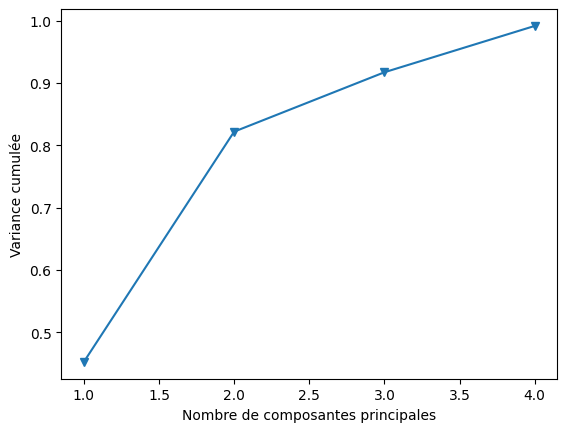

In [ ]:
#Au vu de certaines variables corrélées, on a décidé d'appliquer une PCA pour une elimination des corrélations dans le jeu de donnée pour lui appliquer un modele de classification 
# On voudrai voir si la PCA optimisera notre modele de classification. On comparera donc les modeles avec et sans PCA

import matplotlib.pyplot as plt

pca = PCA(n_components = 4)


#Choisir un nombre de composantes trop élevé peut conduire à un modèle surajusté, tandis qu'un nombre trop faible peut conduire à une sous-représentation des données.

#pca = PCA(n_components=3)

#nos données apres application de la pca
df_pca = pca.fit_transform(df_supp, classColumn)


# Variance expliquée par chaque composante principale
explained_var = pca.explained_variance_ratio_
print(explained_var)
# Variance cumulée en fonction du nombre de composantes principales
cumulative_var = np.cumsum(explained_var)

# Plot de la variance cumulée
plt.plot(range(1, df_pca.shape[1]+1), cumulative_var, marker='v')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée')
plt.show()

In [ ]:
# 4 composantes principales expliquent 90 % de la variance de notre jeu de donnée

In [ ]:
#on divise le jeu de données avec PCA en entrainement et test
# df_converted correspond à la colonne cible, celle des 3 classes encodés

dfWithoutClass_train, dfWithoutClass_test, df_converted_train, df_converted_test = train_test_split(df_pca, df_converted, test_size=0.2, random_state=42)

In [12]:
# on divise lejeu de données sans PCA en entrainement et test
dfWithoutClassWithoutPCA_train, dfWithoutClassWithoutPCA_test, df_converted2_train, df_converted2_test = train_test_split(df_supp, df_converted, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


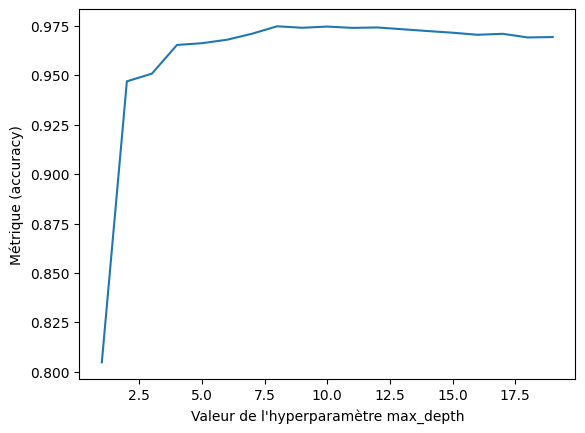

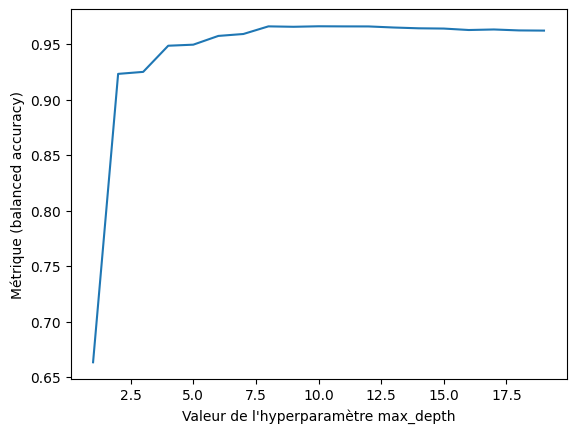

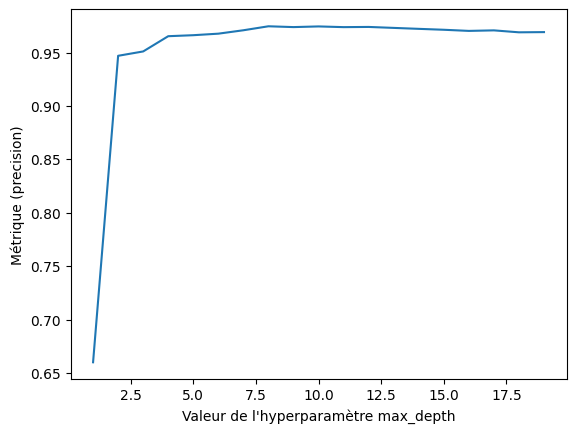

In [17]:
# Graphe de l'évolution des métriques du modèle d'arbre de decision en fonction des valeur de l'hyperparametre profondeur de l'arbre

max_depth = range(1, 20)
metric_scores_accuracy  = []
metric_score_balancedaccuracy = []
metric_scores_precision = []
for value in max_depth: 
  clf = DecisionTreeClassifier(max_depth=value)
  clf.fit(dfWithoutClassWithoutPCA_train, df_converted2_train)
  y_pred = clf.predict(dfWithoutClassWithoutPCA_test)
  estimatorTree = DecisionTreeClassifier(max_depth = value)
  estimatorTree.fit(dfWithoutClassWithoutPCA_train, df_converted2_train )
  predictedTree = estimatorTree.predict(dfWithoutClassWithoutPCA_test)
  scoreTree = estimatorTree.score(dfWithoutClassWithoutPCA_test, df_converted2_test)
  rf_score_Tree = np.mean(scoreTree)
  metric_scores_accuracy.append(rf_score_Tree)
  balanced_accuracy = balanced_accuracy_score(df_converted2_test, predictedTree)
  metric_score_balancedaccuracy.append(balanced_accuracy)
  precisionTree = precision_score(df_converted2_test, predictedTree, average='weighted')
  metric_scores_precision.append(precisionTree)

plt.plot(max_depth, metric_scores_accuracy)
plt.xlabel('Valeur de l\'hyperparamètre max_depth')
plt.ylabel('Métrique (accuracy)')
plt.show()

plt.plot(max_depth, metric_score_balancedaccuracy)
plt.xlabel('Valeur de l\'hyperparamètre max_depth')
plt.ylabel('Métrique (balanced accuracy)')
plt.show()

plt.plot(max_depth, metric_scores_precision)
plt.xlabel('Valeur de l\'hyperparamètre max_depth')
plt.ylabel('Métrique (precision)')
plt.show()

In [ ]:
# Afin d'obtenir d'avoir de bons hyperparametres pour notre modele d'arbre de décision, on utilise une grille de recherche d'hyperparametre combinée à une validation croisée
# arbre de décision avec les données avec PCA
# Définir la grille des paramètres à tester
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 12, 15, 16],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5],
}

# Créer l'estimateur et la grille de recherche
estimator = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator, params, cv=5)

# Lancer la recherche d'hyperparamètres
grid_search.fit(dfWithoutClass_train, df_converted_train )

# Afficher les meilleurs paramètres trouvés et la performance correspondante
print("Best parameters:", grid_search.best_params_)
y_pred = grid_search.predict(dfWithoutClass_test)
accuracy = accuracy_score(df_converted_test, y_pred)
print("Accuracy:", accuracy)
#Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 4}
#Accuracy: 0.93935

Best parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.9342


In [ ]:
# Recherche d'hyperparametre avec validation croisée pour un arbre de décision pour les données sans PCA
# Définir la grille des paramètres à tester
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 12, 15, 16],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# Créer l'estimateur et la grille de recherche
estimatorWP = DecisionTreeClassifier()
grid_searchWP = GridSearchCV(estimatorWP, params, cv=5)

# Lancer la recherche d'hyperparamètres
grid_searchWP.fit(dfWithoutClassWithoutPCA_train, df_converted2_train )

# Afficher les meilleurs paramètres trouvés et la performance correspondante finale sur les données de test
print("Best parameters:", grid_searchWP.best_params_)
y_predWP = grid_searchWP.predict(dfWithoutClassWithoutPCA_test)
accuracy = accuracy_score(df_converted2_test, y_predWP)
print("Accuracy:", accuracy)

# Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
# Accuracy: 0.97585

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.97595


In [ ]:
# Notre modele d'arbre de décision avec PCA qu'on peut tester avec les meilleurs hyperparametres (si vous ne lancez pas la gridsearch)
estimatorTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 16, min_samples_leaf = 5, min_samples_split = 4 )
estimatorTree.fit(dfWithoutClass_train, df_converted_train )
predictedTree = estimatorTree.predict(dfWithoutClass_test)
scoreTree = estimatorTree.score(dfWithoutClass_test, df_converted_test)
rf_score_Tree = np.mean(scoreTree)
print('Accuracy : %.3f' % (rf_score_Tree))

# indicateur de balanced accurracy
balanced_accuracy = balanced_accuracy_score(df_converted_test, predictedTree)
print("Balanced Accuracy:", balanced_accuracy)

#indicateur de précision
precisionTree = precision_score(df_converted_test, predictedTree, average='weighted')
print("Precision:", precisionTree)


Accuracy : 0.934
Balanced Accuracy: 0.9174959003650601
Precision: 0.9338448408031985


Accuracy : 0.976
Balanced Accuracy: 0.9683927428967682
Precision: 0.9758081354190835
Confusion Matrix:


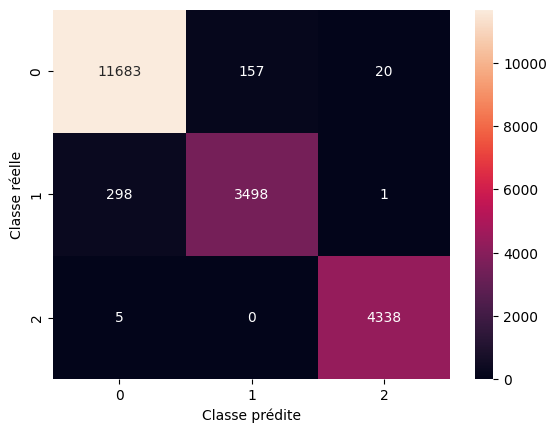

In [ ]:
# on peut tester le modèle avec les meilleurs hyperparametres trouvé par la gridsearch pour le modèle sans PCA (si vous ne lancez pas la gridsearch) 
estimatorTreeWithoutPCA = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 5 )
estimatorTreeWithoutPCA.fit(dfWithoutClassWithoutPCA_train, df_converted2_train)
predictedTree2 = estimatorTreeWithoutPCA.predict(dfWithoutClassWithoutPCA_test)
scoreTree2 = estimatorTreeWithoutPCA.score(dfWithoutClassWithoutPCA_test, df_converted2_test)
rf_score_Tree2 = np.mean(scoreTree2)

#indicateur d'exactitude (accuracy)
print('Accuracy : %.3f' % (rf_score_Tree2))

# indicateur de balanced accurracy
balanced_accuracy = balanced_accuracy_score(df_converted2_test, predictedTree2)
print("Balanced Accuracy:", balanced_accuracy)

#indicateur de précision
precisionTree2 = precision_score(df_converted2_test, predictedTree2, average='weighted')
print("Precision:", precisionTree2)



# Calcul de la matrice de confusion
confusion_matTreeWithoutPCA = confusion_matrix(df_converted2_test, predictedTree2)
print("Confusion Matrix:")
# # Affichage de l'indicateur matrice de confusion
sns.heatmap(confusion_matTreeWithoutPCA, annot=True, fmt="d")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

On rajoute un autre modéle de classification qui est le random forest et on compare a la fin avec l'algorithme d'arbre de décision 

In [ ]:
# on divise lejeu de données sans PCA en entrainement et test
dfWithoutClassWithoutPCA_train, dfWithoutClassWithoutPCA_test, df_converted2_train, df_converted2_test = train_test_split(df_supp, df_converted, test_size=0.2, random_state=42)


In [ ]:
# modele de forets aléatoires pour les données avec PCA

r_forest = RandomForestClassifier()
r_forest.fit(dfWithoutClass_train, df_converted_train )
predicted = r_forest.predict(dfWithoutClass_test)
score = r_forest.score(dfWithoutClass_test, df_converted_test)
rf_score_ = np.mean(score)

#indicateur de précision
precision = precision_score(df_converted_test, predicted, average='weighted')
print("Precision:", precision)

# indicateur de balanced accurracy
balanced_accuracy = balanced_accuracy_score(df_converted_test, predicted)
print("Balanced Accuracy:", balanced_accuracy)

#indicateur d'exactitude (accuracy)
print('Accuracy : %.3f' % (rf_score_))



In [ ]:
# modele de forets aléatoires pour les données sans PCA

r_forestWithoutPCA = RandomForestClassifier()
r_forestWithoutPCA.fit(dfWithoutClassWithoutPCA_train, df_converted2_train )
predictedForestWithoutPCA = r_forestWithoutPCA.predict(dfWithoutClassWithoutPCA_test)
scoreWithoutPCA = r_forestWithoutPCA.score(dfWithoutClassWithoutPCA_test, df_converted2_test)
rf_score_WithoutPCA = np.mean(scoreWithoutPCA)

#indicateur de precision
precision2 = precision_score(df_converted2_test, predictedForestWithoutPCA, average='weighted')
print("Precision:", precision2)

#indicateur d'exactitude (accuracy)
print('Accuracy : %.3f' % (rf_score_WithoutPCA))

# indicateur de balanced accurracy
balanced_accuracy = balanced_accuracy_score(df_converted2_test, predictedForestWithoutPCA)
print("Balanced Accuracy:", balanced_accuracy)

# Calcul de la matrice de confusion
confusion_matForestWithoutPCA = confusion_matrix(df_converted2_test, predictedForestWithoutPCA)
print("Confusion Matrix:")
# Affichage de l'indicateur matrice de confusion 
sns.heatmap(confusion_matForestWithoutPCA, annot=True, fmt="d")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

NameError: ignored